In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading data
data = pd.read_csv('./datasets/amazon.csv')
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

### Performing Data Cleaning

I will not be performing a full data cleaning but selecting the coloumn i will be working with, then clean them.

In [6]:
data_df = data[['product_id', 'product_name', 'rating', 'user_id', 'category']]

In [7]:
data_df['rating'].unique()

array(['4.2', '4', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3', '3.6',
       '3.4', '3.8', '3.5', '4.6', '3.2', '5', '4.7', '3', '2.8', '3.1',
       '4.8', '2.3', '|', '2', '2.6', '2.9'], dtype=object)

In [8]:
data_df.loc[:, 'rating'] =  data_df.loc[:, 'rating'].str.replace('|', '0').astype(float)


In [9]:
data_df['rating'].unique()

array([4.2, 4.0, 3.9, 4.1, 4.3, 4.4, 4.5, 3.7, 3.3, 3.6, 3.4, 3.8, 3.5,
       4.6, 3.2, 5.0, 4.7, 3.0, 2.8, 3.1, 4.8, 2.3, 0.0, 2.0, 2.6, 2.9],
      dtype=object)

In [10]:
data_df.loc[:, 'product_name']

0       Wayona Nylon Braided USB to Lightning Fast Cha...
1       Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
2       Sounce Fast Phone Charging Cable & Data Sync U...
3       boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...
4       Portronics Konnect L 1.2M Fast Charging 3A 8 P...
                              ...                        
1460    Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...
1461    Prestige Delight PRWO Electric Rice Cooker (1 ...
1462    Bajaj Majesty RX10 2000 Watts Heat Convector R...
1463    Havells Ventil Air DSP 230mm Exhaust Fan (Pist...
1464    Borosil Jumbo 1000-Watt Grill Sandwich Maker (...
Name: product_name, Length: 1465, dtype: object

In [11]:
# Expand multiple user_ids into separate rows
data_df.loc[:, 'user_id'] = data_df.loc[:, 'user_id'].str.split(',')
df_expanded = data_df.explode('user_id')
df_expanded.head(15)

,product_id,product_name,rating,user_id,category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AG3D6O4STAQKAY2UVGEUV46KN35Q,Computers&Accessories|Accessories&Peripherals|...
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Computers&Accessories|Accessories&Peripherals|...
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Computers&Accessories|Accessories&Peripherals|...
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,Computers&Accessories|Accessories&Peripherals|...
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,Computers&Accessories|Accessories&Peripherals|...
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AENGU523SXMOS7JPDTW52PNNVWGQ,Computers&Accessories|Accessories&Peripherals|...
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,Computers&Accessories|Accessories&Peripherals|...
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,Computers&Accessories|Accessories&Peripherals|...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,4.0,AECPFYFQVRUWC3KGNLJIOREFP5LQ,Computers&Accessories|Accessories&Peripherals|...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,4.0,AGYYVPDD7YG7FYNBXNGXZJT525AQ,Computers&Accessories|Accessories&Peripherals|...


In [12]:
df_expanded.drop_duplicates(subset=['user_id', 'product_id'], inplace=True)

In [13]:
df_expanded.head(15)

,product_id,product_name,rating,user_id,category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AG3D6O4STAQKAY2UVGEUV46KN35Q,Computers&Accessories|Accessories&Peripherals|...
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Computers&Accessories|Accessories&Peripherals|...
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Computers&Accessories|Accessories&Peripherals|...
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,Computers&Accessories|Accessories&Peripherals|...
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,Computers&Accessories|Accessories&Peripherals|...
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AENGU523SXMOS7JPDTW52PNNVWGQ,Computers&Accessories|Accessories&Peripherals|...
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,Computers&Accessories|Accessories&Peripherals|...
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,Computers&Accessories|Accessories&Peripherals|...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,4.0,AECPFYFQVRUWC3KGNLJIOREFP5LQ,Computers&Accessories|Accessories&Peripherals|...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,4.0,AGYYVPDD7YG7FYNBXNGXZJT525AQ,Computers&Accessories|Accessories&Peripherals|...


In [14]:
# Create broader category groups
def simplify_category(category):
    if pd.isna(category):
        return 'Other'
    
    main_cat = category.split('|')[0]
    
    # Group similar categories
    if main_cat == 'Electronics':
        if 'Mobile' in category:
            return 'Mobile & Accessories'
        elif 'Computer' in category or 'Laptop' in category:
            return 'Computing & Accessories'
        elif 'Audio' in category or 'Headphone' in category:
            return 'Audio'
        elif 'Camera' in category:
            return 'Camera & Photography'
        elif 'TV' in category or 'Theater' in category:
            return 'TV & Home Theater'
        else:
            return 'Other Electronics'
    
    elif main_cat == 'Computers&Accessories':
        return 'Computing & Accessories'
    
    elif main_cat == 'Home&Kitchen':
        return 'Home & Kitchen'
    
    elif main_cat == 'OfficeProducts':
        return 'Office & Stationery'
    
    else:
        return main_cat

In [15]:
df_expanded.loc[:, 'simplified_category'] = df_expanded.loc[:, 'category'].apply(simplify_category)

In [16]:
df_expanded.head(10)

,product_id,product_name,rating,user_id,category,simplified_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AG3D6O4STAQKAY2UVGEUV46KN35Q,Computers&Accessories|Accessories&Peripherals|...,Computing & Accessories
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Computers&Accessories|Accessories&Peripherals|...,Computing & Accessories
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Computers&Accessories|Accessories&Peripherals|...,Computing & Accessories
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,Computers&Accessories|Accessories&Peripherals|...,Computing & Accessories
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,Computers&Accessories|Accessories&Peripherals|...,Computing & Accessories
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AENGU523SXMOS7JPDTW52PNNVWGQ,Computers&Accessories|Accessories&Peripherals|...,Computing & Accessories
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,Computers&Accessories|Accessories&Peripherals|...,Computing & Accessories
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,Computers&Accessories|Accessories&Peripherals|...,Computing & Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,4.0,AECPFYFQVRUWC3KGNLJIOREFP5LQ,Computers&Accessories|Accessories&Peripherals|...,Computing & Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,4.0,AGYYVPDD7YG7FYNBXNGXZJT525AQ,Computers&Accessories|Accessories&Peripherals|...,Computing & Accessories


###  Building User-Item Matrix

In [17]:
user_item_matrix = df_expanded.pivot_table(
    index='user_id', columns='product_id', values='rating')
user_item_matrix.head()

product_id,B002PD61Y4,B002SZEOLG,B003B00484,B003L62T7W,B004IO5BMQ,B005FYNT3G,B005LJQMCK,B005LJQMZC,B006LW0WDQ,B0073QGKAS,...,B0BP18W8TM,B0BP7XLX48,B0BP89YBC1,B0BPBG712X,B0BPBXNQQT,B0BPCJM7TB,B0BPJBTB3F,B0BQ3K23Y1,B0BQRJ3C47,B0BR4F878Q
user_id,,,,,,,,,,,,,,,,,,,,,
AE22E2AXODSPNK3EBIHNGYS5LOSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AE22MK2NXQD3ZARLIOL3SLD4GU6A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AE23RS3W7GZO7LHYKJU6KSKVM4MQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AE23WGYTUMB5R6JJMBU4V43JIW7Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
user_item_matrix.shape

(9050, 1351)

In [19]:
(user_item_matrix.notna().sum() / len(user_item_matrix)) * 100

product_id
B002PD61Y4    0.088398
B002SZEOLG    0.088398
B003B00484    0.088398
B003L62T7W    0.088398
B004IO5BMQ    0.088398
                ...   
B0BPCJM7TB    0.088398
B0BPJBTB3F    0.022099
B0BQ3K23Y1    0.088398
B0BQRJ3C47    0.011050
B0BR4F878Q    0.033149
Length: 1351, dtype: float64

In [20]:
# Fill missing ratings with 0 (or could use mean imputation)
user_item_matrix_filled = user_item_matrix.fillna(0)


C:\Users\Great Speed\AppData\Local\Temp\ipykernel_3920\1872262927.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_item_matrix_filled = user_item_matrix.fillna(0)


In [21]:
user_item_matrix_filled.columns

Index(['B002PD61Y4', 'B002SZEOLG', 'B003B00484', 'B003L62T7W', 'B004IO5BMQ',
       'B005FYNT3G', 'B005LJQMCK', 'B005LJQMZC', 'B006LW0WDQ', 'B0073QGKAS',
       ...
       'B0BP18W8TM', 'B0BP7XLX48', 'B0BP89YBC1', 'B0BPBG712X', 'B0BPBXNQQT',
       'B0BPCJM7TB', 'B0BPJBTB3F', 'B0BQ3K23Y1', 'B0BQRJ3C47', 'B0BR4F878Q'],
      dtype='object', name='product_id', length=1351)

### Apply KMeans Clustering

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(user_item_matrix_filled)

In [23]:
k = 9
kmeans = KMeans(n_clusters=k, init ='k-means++', max_iter=300, n_init=10, random_state=0)
user_clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to users
user_item_matrix_filled['Cluster'] = user_clusters

C:\Users\Great Speed\AppData\Local\Temp\ipykernel_3920\855436510.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_item_matrix_filled['Cluster'] = user_clusters


In [24]:
user_item_matrix_filled.head()

product_id,B002PD61Y4,B002SZEOLG,B003B00484,B003L62T7W,B004IO5BMQ,B005FYNT3G,B005LJQMCK,B005LJQMZC,B006LW0WDQ,B0073QGKAS,...,B0BP7XLX48,B0BP89YBC1,B0BPBG712X,B0BPBXNQQT,B0BPCJM7TB,B0BPJBTB3F,B0BQ3K23Y1,B0BQRJ3C47,B0BR4F878Q,Cluster
user_id,,,,,,,,,,,,,,,,,,,,,
AE22E2AXODSPNK3EBIHNGYS5LOSA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
AE22MK2NXQD3ZARLIOL3SLD4GU6A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
AE23RS3W7GZO7LHYKJU6KSKVM4MQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
AE23WGYTUMB5R6JJMBU4V43JIW7Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [25]:
user_item_matrix_filled['Cluster'].unique()

array([6, 2, 8, 1, 4, 3, 0, 5, 7])

#### To find the best value of k

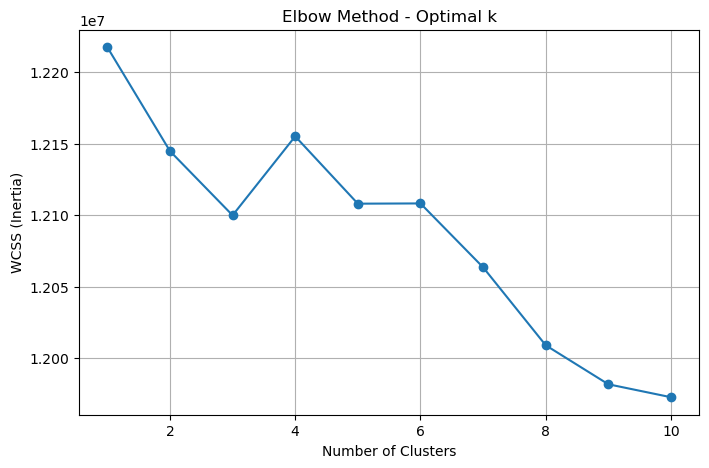

In [26]:
wcss = []
X = X_scaled  # Scaled user-product matrix

# Try k from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init=5, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

### Visualize User Clusters

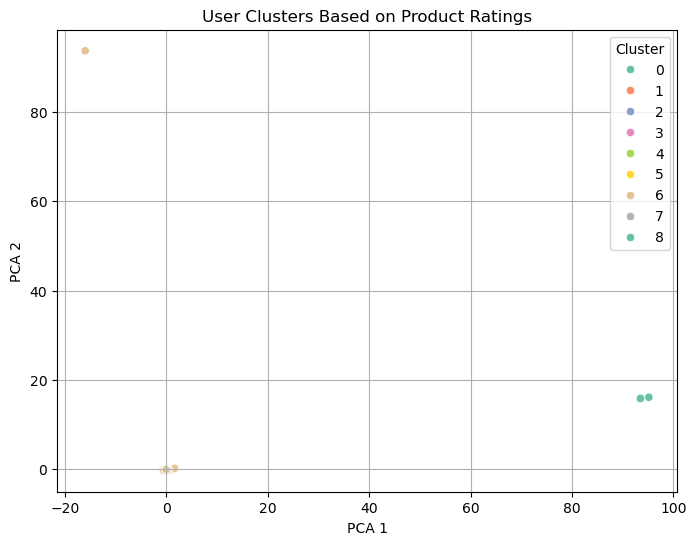

In [27]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=user_clusters, palette='Set2')
plt.title("User Clusters Based on Product Ratings")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [28]:
# Users with cluster id 3
user_item_matrix_filled[user_item_matrix_filled['Cluster'] == 3]

product_id,B002PD61Y4,B002SZEOLG,B003B00484,B003L62T7W,B004IO5BMQ,B005FYNT3G,B005LJQMCK,B005LJQMZC,B006LW0WDQ,B0073QGKAS,...,B0BP7XLX48,B0BP89YBC1,B0BPBG712X,B0BPBXNQQT,B0BPCJM7TB,B0BPJBTB3F,B0BQ3K23Y1,B0BQRJ3C47,B0BR4F878Q,Cluster
user_id,,,,,,,,,,,,,,,,,,,,,
AEJQT5NMTAM2ZRPQDNGLOL6NTKRQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
AFFKCAWOTYV7EXKMDMQ5NVRRUV5Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
AFLEQIFCKD7EUBQTHJ7T7XF4MWMQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
AGOYRCQ3PNL2AIXWYLPSXVQYGJEA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
AH445QA3XXIV6FPASBU6OBICSLYQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
AHIKFQ5VP6QGYQK3GJICMV4U7ULA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
AHLORXFV6I3JRBNER3O6DIOVWM5A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
AHT6SE3YNTHR76UT4QDQKBHEH5EQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
AHWEF3345QLMPIGGOW6VUYJZEFDQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [29]:
user_item_matrix_filled[user_item_matrix_filled['Cluster'] == 3].mean().sort_values(ascending=False)

product_id
B09YV4MW2T    4.200000
B09YV3K34W    3.733333
Cluster       3.000000
B09GFM8CGS    0.000000
B09GBBJV72    0.000000
                ...   
B07WFPMGQQ    0.000000
B07WDKLRM4    0.000000
B07WDKLDRX    0.000000
B07WDK3ZS6    0.000000
B08LKS3LSP    0.000000
Length: 1352, dtype: float64

### Recommend Products 

In [30]:
def recommend_for_user(user_id, user_matrix, original_df, n_recommendations=5):
    if user_id not in user_matrix.index:
        return "User not found."

    # Getting the cluster the user belongs to
    cluster_id = user_matrix.loc[user_id, 'Cluster']
    cluster_users = user_matrix[user_matrix['Cluster'] == cluster_id].drop('Cluster', axis=1)

    # Average rating per product in cluster
    product_scores = cluster_users.mean().sort_values(ascending=False)

    # Products the user has already rated
    user_rated = original_df[original_df['user_id'] == user_id]['product_id'].unique()

    # Recommend top N unrated products
    recommendations = product_scores[~product_scores.index.isin(user_rated)].head(n_recommendations)
    return original_df[original_df['product_id'].isin(recommendations.index)]['product_name'].unique()

In [31]:
example_user = user_item_matrix_filled.index[0] # AHWEF3345QLMPIGGOW6VUYJZEFDQ	
recs = recommend_for_user(example_user, user_item_matrix_filled, df_expanded)
print(f"\nRecommended products for user {example_user}:")
for i, j in enumerate(recs, start=1):
    print(f"{i}. {j}")


Recommended products for user AE22E2AXODSPNK3EBIHNGYS5LOSA:
1. Samsung EVO Plus 128GB microSDXC UHS-I U3 130MB/s Full HD & 4K UHD Memory Card with Adapter (MB-MC128KA), Blue
2. Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop
3. Oratech Coffee Frother electric, milk frother electric, coffee beater, cappuccino maker, Coffee Foamer, Mocktail Mixer, Coffee Foam Maker, coffee whisker electric, Froth Maker, coffee stirrers electric, coffee frothers, Coffee Blender, (6 Month Warranty) (Multicolour)
4. Zuvexa USB Rechargeable Electric Foam Maker - Handheld Milk Wand Mixer Frother for Hot Milk, Hand Blender Coffee, Egg Beater (Black)
5. Instant Pot Air Fryer, Vortex 2QT, Touch Control Panel, 360° EvenCrisp™ Technology, Uses 95 % less Oil, 4-in-1 Appliance: Air Fry, Roast, Bake, Reheat (Vortex 1.97Litre, Black)


In [32]:
import joblib

joblib.dump(scaler, 'X-scaler.pkl')
joblib.dump(kmeans, 'kmeans_recommendation_model.pkl')

['kmeans_recommendation_model.pkl']

In [33]:

joblib.dump(user_item_matrix_filled, 'user_item_matrix_filled.pkl')

['user_item_matrix_filled.pkl']